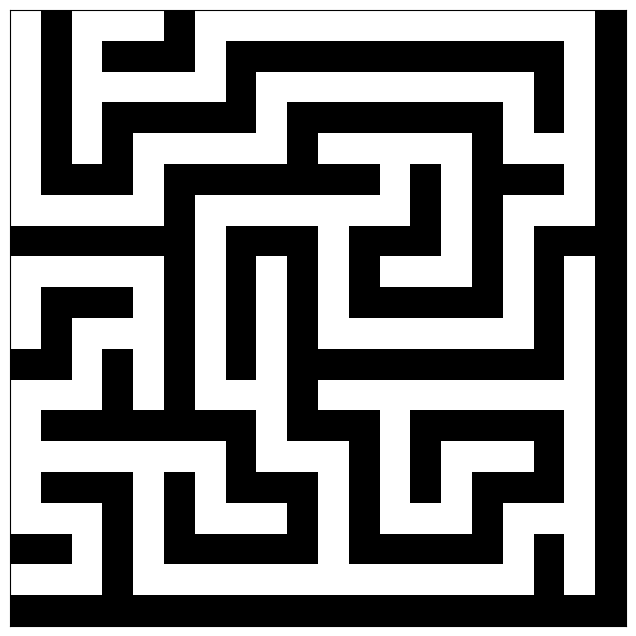

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from collections import deque

# Maze size
SIZE = 20

# Directions: Right, Down, Left, Up
DIRS = [(0, 1), (1, 0), (0, -1), (-1, 0)]

def generate_maze(size):
    maze = np.ones((size, size))  # 1 = wall, 0 = path
    stack = [(0, 0)]
    maze[0][0] = 0
    
    while stack:
        x, y = stack[-1]
        neighbors = []
        
        for dx, dy in DIRS:
            nx, ny = x + dx * 2, y + dy * 2
            if 0 <= nx < size and 0 <= ny < size and maze[nx][ny] == 1:
                neighbors.append((nx, ny))
        
        if neighbors:
            nx, ny = random.choice(neighbors)
            maze[x + (nx - x) // 2][y + (ny - y) // 2] = 0
            maze[nx][ny] = 0
            stack.append((nx, ny))
        else:
            stack.pop()
    
    return maze

def solve_maze(maze):
    size = maze.shape[0]
    start = (0, 0)
    end = (size - 1, size - 1)
    queue = deque([([start], start)])  # (path, position)
    visited = set()
    
    while queue:
        path, (x, y) = queue.popleft()
        if (x, y) == end:
            return path
        for dx, dy in DIRS:
            nx, ny = x + dx, y + dy
            if 0 <= nx < size and 0 <= ny < size and maze[nx][ny] == 0 and (nx, ny) not in visited:
                visited.add((nx, ny))
                queue.append((path + [(nx, ny)], (nx, ny)))
    
    return None

def plot_maze(maze, solution=None):
    plt.figure(figsize=(8, 8))
    plt.imshow(maze, cmap="binary")
    
    if solution:
        x, y = zip(*solution)
        plt.plot(y, x, color="red", linewidth=2)
    
    plt.xticks([])  # Remove ticks
    plt.yticks([])
    plt.show()

# Generate and solve the maze
maze = generate_maze(SIZE)
solution = solve_maze(maze)

# Plot the maze and solution
plot_maze(maze, solution)
